In [1]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.io import wavfile # package to read WAV file
import pandas as pd
sns.set_style("white")
sns.set_style("ticks")
import warnings
warnings.filterwarnings("ignore")
import librosa
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import json
import matplotlib.pyplot as plt # matplot lib is the premiere plotting lib for Python: https://matplotlib.org/
import numpy as np # numpy is the premiere signal handling library for Python: http://www.numpy.org/
import scipy as sp # for signal processing
from scipy import signal
from scipy.io import wavfile

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import Audio

#for filter
from scipy.signal import butter
from scipy.signal import lfilter
from scipy.signal import freqz;

In [2]:
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='highpass', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y;

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y



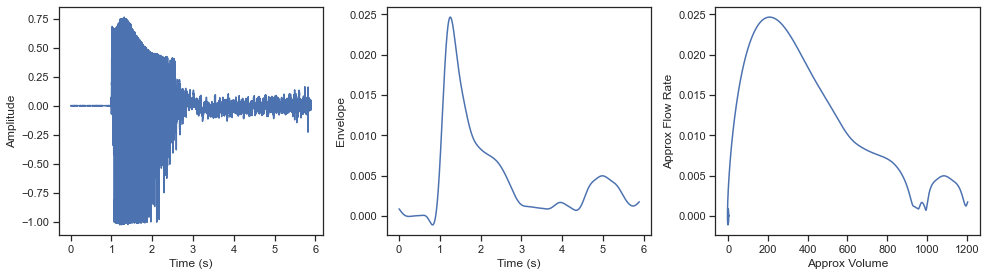

In [15]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
x, fs = librosa.load("sample_data/audio/sample_1.wav", sr=44100)
t = np.arange(0,len(x))/fs

# plot the raw audio
ax[0].plot(t,x)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Amplitude")

# filtering params. Higher the order, higher the complexity, slower the filtering
cutoff_low = 3000 
cutoff_high = 5000
order = 2

# filter the audio signal
x_filt = butter_bandpass_filter(x,cutoff_low,cutoff_high,fs,order)

# perform hilbert transformation
x_filt_hilbert = signal.hilbert(x_filt)
envelope_hat = np.abs(x_filt_hilbert)


# now filter the hilbert transformed signal
nyq_rate = fs /0.5
width = 1.0/nyq_rate 
ripple_db = 10.0 
fL_hz = 10
N, beta = signal.kaiserord(ripple_db, width)
taps = signal.firwin(N, fL_hz/nyq_rate, window=('kaiser', beta))
envelope_hat_filt = signal.filtfilt(taps, 1,envelope_hat)
t = np.arange(0,len(envelope_hat_filt))/fs
estdVolume = np.cumsum(envelope_hat_filt)

# plot the hilbert envelope with respect to time
ax[1].plot(t, envelope_hat_filt)
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Envelope")

# plot the hilbert envelope with with respect to the volume'
ax[2].plot(estdVolume, envelope_hat_filt)
ax[2].set_xlabel("Approx Volume")
ax[2].set_ylabel("Approx Flow Rate")
fig.tight_layout()